In [1]:
'''
This script uses the SamenvoegenCSV_metermonitoring dataset (xlsx format)
and the Bezetting kantoren bij heropstart - Gent dataset (xlsx format)
It evaluates the relation between occupancy rate and total power consumption
Scatterplot and curve fitting are used for this purpose
'''

'\nThis script uses the SamenvoegenCSV_metermonitoring dataset (xlsx format)\nand the EV Charging behaviours - Gent dataset (xlsx format)\nIt plots the average total power consumption per hour\nThe average number of cars charging is also plotted\n'

In [2]:
import numpy as np
import datetime as dt
import sklearn
import pandas as pd
from sklearn import preprocessing 

In [3]:
# read data


df = pd.read_excel (r'Data/SamenvoegenCSV_metermonitoring.xlsx')
X=df.copy()

In [5]:
# select power format of data


df_power = X[X['Extra info'] =="Actief vermogen totaal"]


In [7]:
# sum powers of circuits of same timestamp
# skip the first timestamp as it is a sample reading

indices=df_power.index.values

list_of_dates=[]
list_of_total_power=[]

counter=0
total_power=0
for i in range(4,len(indices)):
    counter=counter+1
    total_power=total_power+df_power.loc[indices[i]]["Meetwaarde"]
    if counter==4:
        counter=0
        list_of_total_power.append(total_power)
        total_power=0
        list_of_dates.append(df_power.loc[indices[i]]["Tijdstip"])

In [8]:
# group data per day (sum and count)


from datetime import datetime


power_date_dict = {}
power_date_dict_we = {}



for i in range(len(list_of_dates)):
    date_time=list_of_dates[i]
    curr_date=date_time.date()
    weekno = date_time.weekday()
    dict_to_use=power_date_dict
    if weekno > 4:
        dict_to_use=power_date_dict_we
    if curr_date in dict_to_use:
        dict_to_use[curr_date][0]=dict_to_use[curr_date][0]+list_of_total_power[i]
        dict_to_use[curr_date][1]=dict_to_use[curr_date][1]+1
    else:
        dict_to_use[curr_date]=[list_of_total_power[i],1]

In [9]:
# reformat to get average (sum/count)


list_of_dates=[]
list_of_powers=[]
for key in power_date_dict:
    list_of_dates.append(key)
list_of_dates=sorted(list_of_dates)
for key in list_of_dates:
    value=power_date_dict[key]
    list_of_powers.append(value[0]/(1000*value[1]))
    power_date_dict[key][0]=value[0]/(1000*value[1])
    power_date_dict[key][1]=1
    
list_of_dates_we=[]
list_of_powers_we=[]
for key in power_date_dict_we:
    list_of_dates_we.append(key)
list_of_dates_we=sorted(list_of_dates_we)
for key in list_of_dates_we:
    value=power_date_dict_we[key]
    list_of_powers_we.append(value[0]/(1000*value[1]))

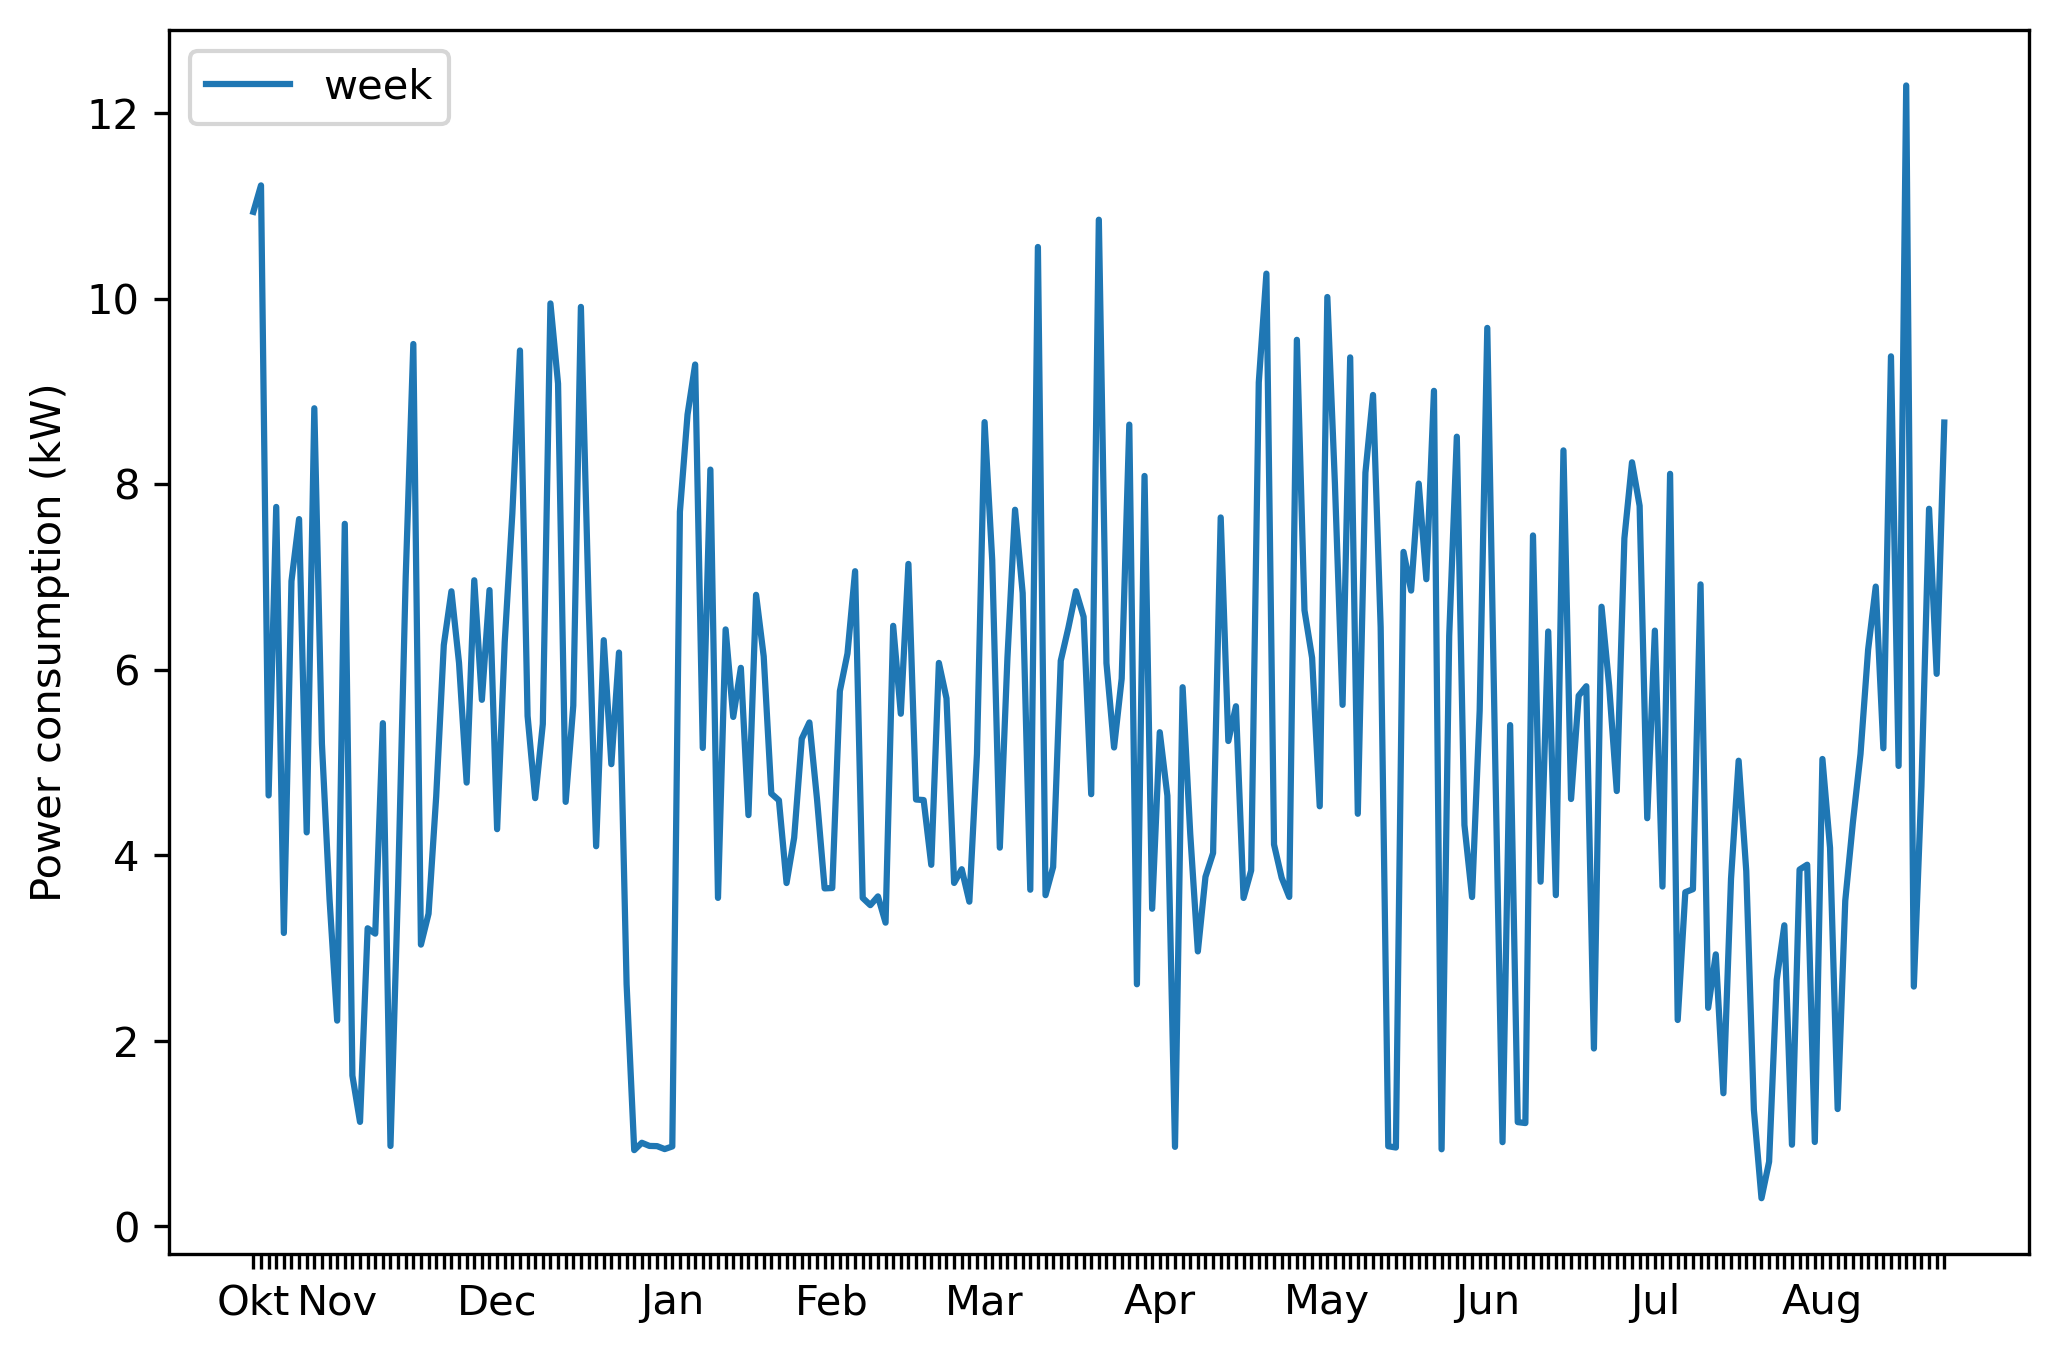

In [10]:
# plot average total power consumption per day during the week

import matplotlib.pyplot as plt
import os
from matplotlib.pyplot import figure

x_labels=[]

current_month=-1

months=["Jan","Feb","Mar","Apr","May","Jun","Jul","Aug","Sep","Okt","Nov","Dec",]

for date in list_of_dates:
    if date.month != current_month:
        current_month=date.month
        x_labels.append(months[date.month-1])
    else:
        x_labels.append("")
        
        
fig = plt.figure(figsize=(8, 6), dpi=300)
spacing = 0.2
fig.subplots_adjust(bottom=spacing)


plt.plot(range(len(list_of_dates)), list_of_powers,label = "week")
plt.xticks((range(len(list_of_dates))), x_labels)
plt.ylabel('Power consumption (kW)')
plt.legend()
plt.savefig(os.path.join('average power consumption per day week.png'), dpi=300, format='png')

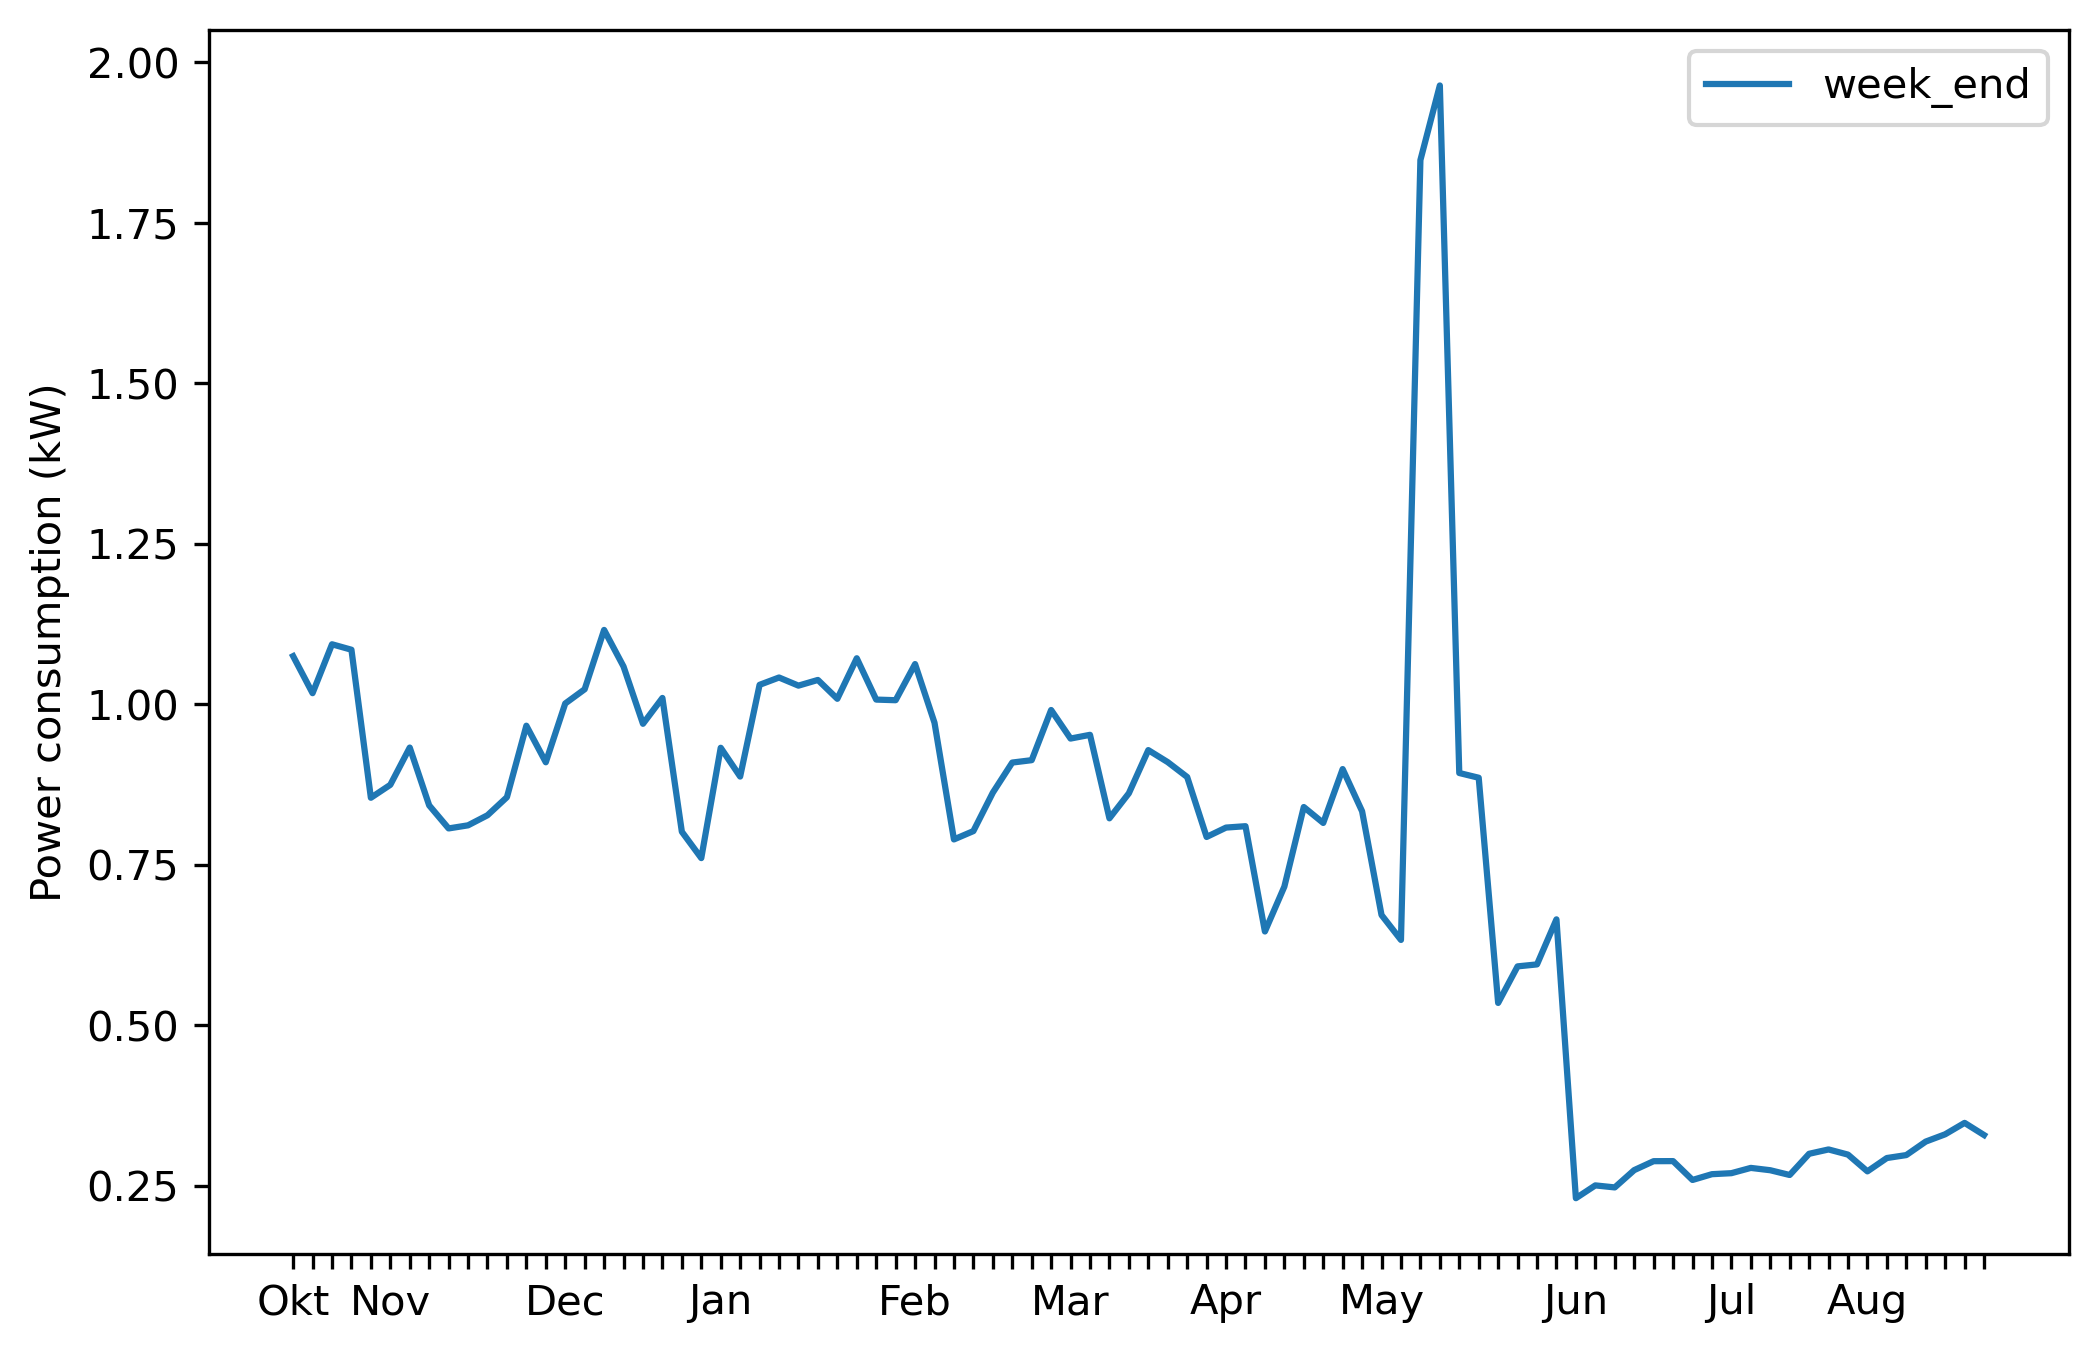

In [11]:
# plot average total power consumption per day during the weekend


import matplotlib.pyplot as plt
import os
from matplotlib.pyplot import figure

x_labels=[]

current_month=-1

months=["Jan","Feb","Mar","Apr","May","Jun","Jul","Aug","Sep","Okt","Nov","Dec",]

for date in list_of_dates_we:
    if date.month != current_month:
        current_month=date.month
        x_labels.append(months[date.month-1])
    else:
        x_labels.append("")
        
        
fig = plt.figure(figsize=(8, 6), dpi=300)
spacing = 0.2
fig.subplots_adjust(bottom=spacing)


plt.plot(range(len(list_of_dates_we)), list_of_powers_we,label = "week_end")
plt.ylabel('Power consumption (kW)')

plt.xticks((range(len(list_of_dates_we))), x_labels)
plt.legend()
plt.savefig(os.path.join('average power consumption per day weekend.png'), dpi=300, format='png')

In [12]:
# read data occupancy rate


df_bezetting = pd.read_excel(r'Data/Bezetting kantoren bij heropstart - Gent.xlsx')
X_bezetting=df_bezetting.copy()


In [14]:
# filter dates from raw data


import math
import datetime

dates_raw=X_bezetting.iloc[0]
bezetting_raw=X_bezetting.iloc[2]
dates_clean=[]
bezetting_clean=[]

for i in range(len(dates_raw)):
    raw_date=dates_raw[i]
    raw_bezetting=bezetting_raw[i]
    if isinstance(raw_date, datetime.date):
        dates_clean.append(raw_date)
        bezetting_clean.append(raw_bezetting)



No handles with labels found to put in legend.


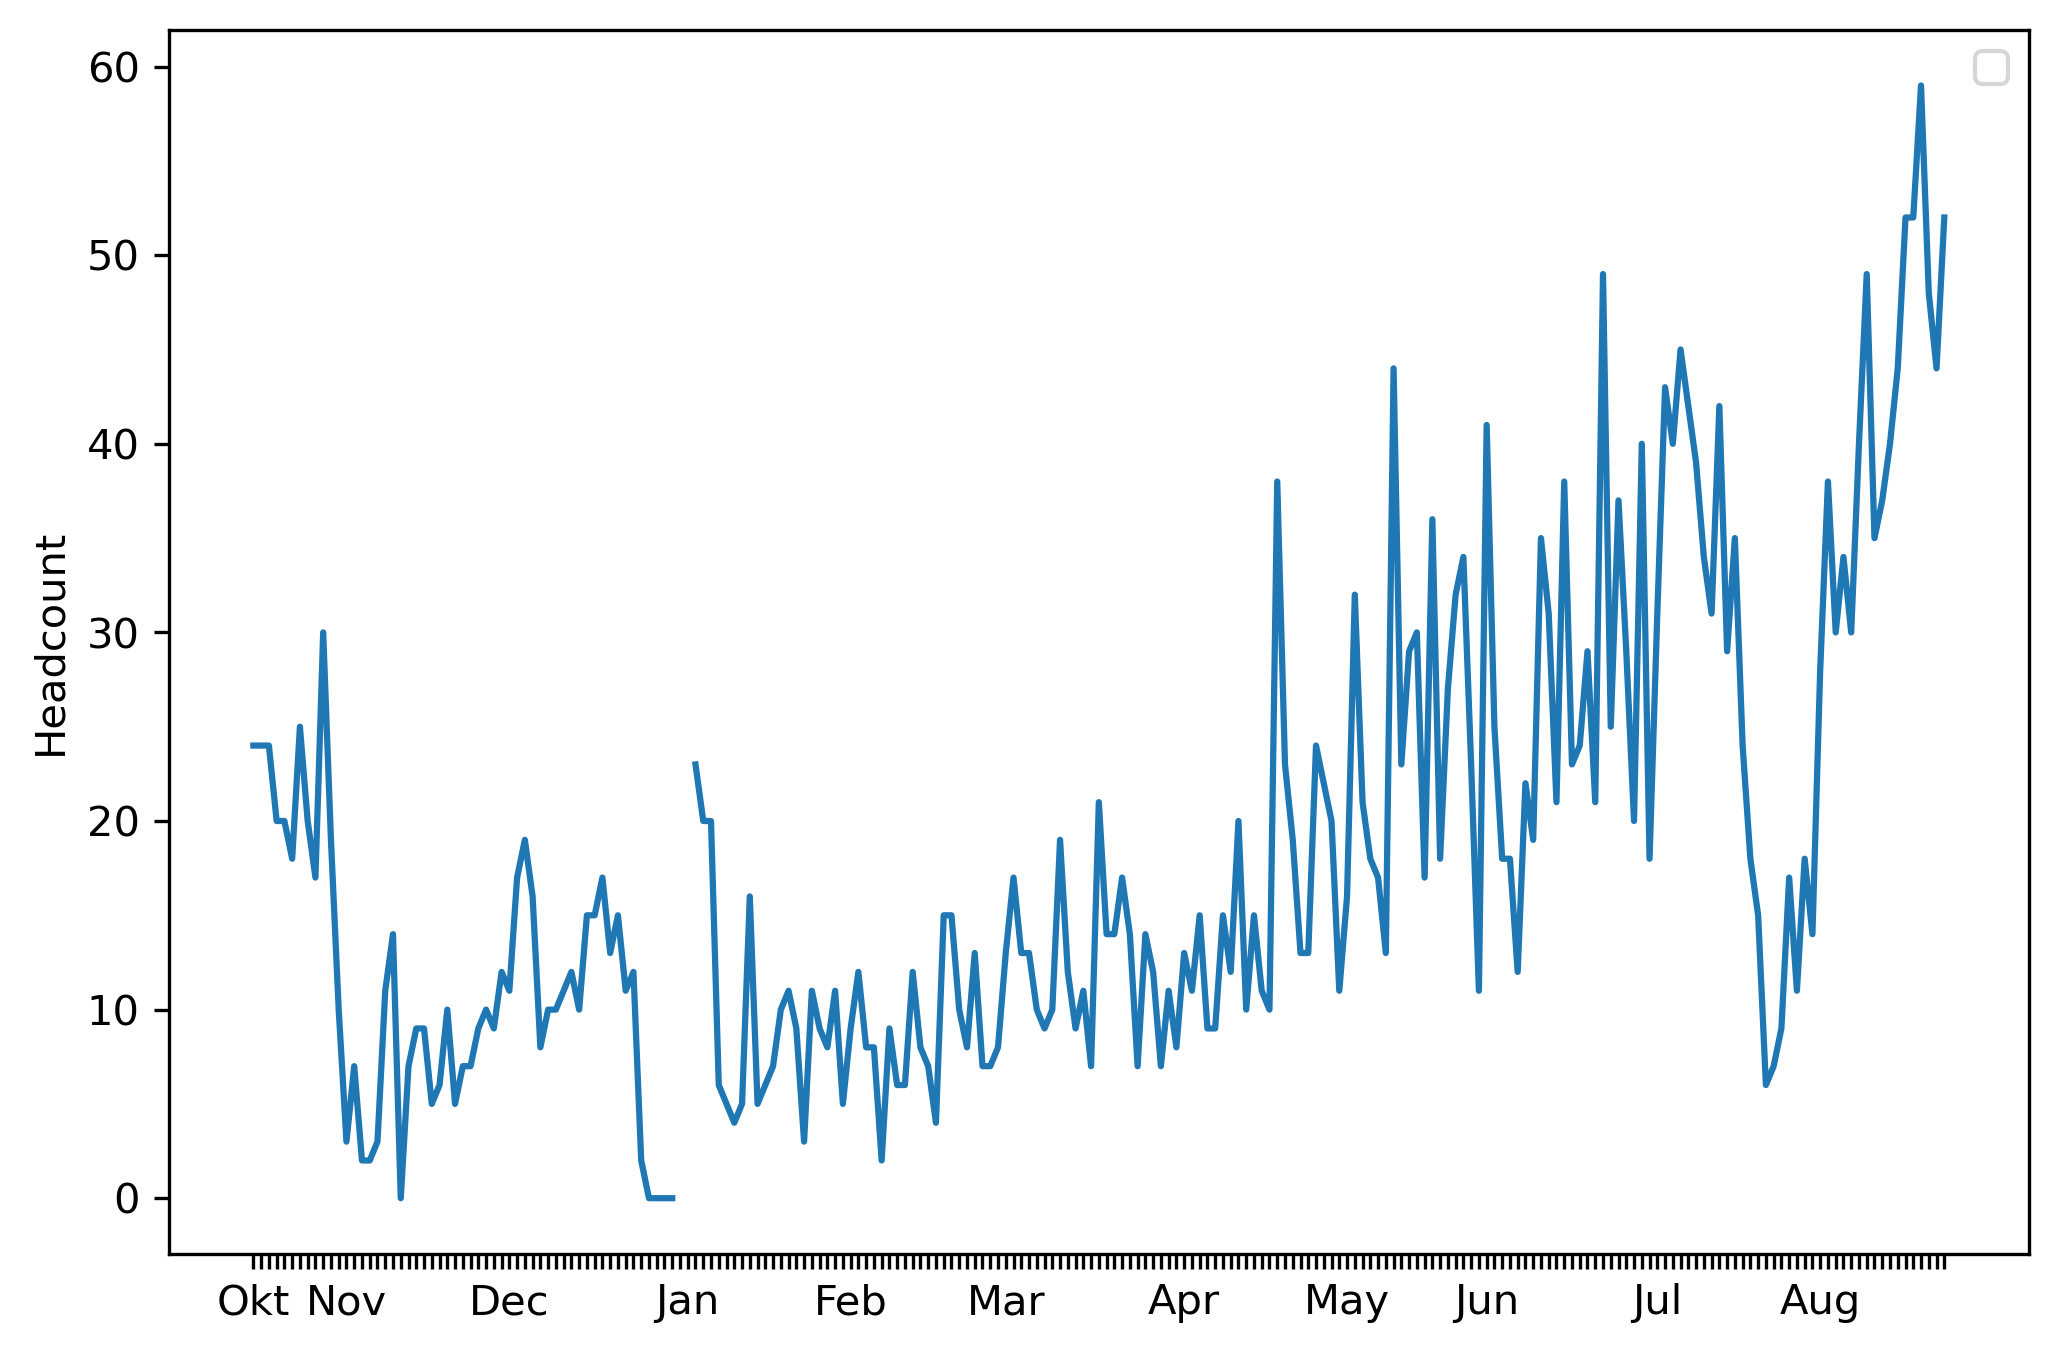

In [15]:
# plot occupancy rate each day

import matplotlib.pyplot as plt
import os
from matplotlib.pyplot import figure

x_labels=[]

current_month=-1

months=["Jan","Feb","Mar","Apr","May","Jun","Jul","Aug","Sep","Okt","Nov","Dec",]

for date in dates_clean:
    if date.month != current_month:
        current_month=date.month
        x_labels.append(months[date.month-1])
    else:
        x_labels.append("")
        
        
fig = plt.figure(figsize=(8, 6), dpi=300)
spacing = 0.2
fig.subplots_adjust(bottom=spacing)


plt.plot(range(len(dates_clean)), bezetting_clean)
plt.xticks((range(len(dates_clean))), x_labels)
plt.ylabel('Headcount')

plt.legend()
plt.savefig(os.path.join('occupancy per day.png'), dpi=300, format='png')

In [16]:
# reformat date into dictionary

occupancy_date_dict = {}
occupancy_date_dict_we = {}


for i in range(len(dates_clean)):
    date_time=dates_clean[i]
    curr_date=date_time.date()
    weekno = date_time.weekday()
    dict_to_use=occupancy_date_dict
    if weekno > 4:
        dict_to_use=occupancy_date_dict_we
    dict_to_use[curr_date]=[bezetting_clean[i]]

In [17]:
# get overlapping dates between two datasets


intersection = occupancy_date_dict.keys() & power_date_dict.keys()

occ=[]
powr=[]
intersection_dates=[]

for key in intersection:
    occ_i=occupancy_date_dict[key][0]
    powr_i=occupancy_date_dict[key][0]
    if not math.isnan(occ_i) and not math.isnan(powr_i):
        occ.append(occupancy_date_dict[key][0])
        powr.append(power_date_dict[key][0])
        intersection_dates.append(key)


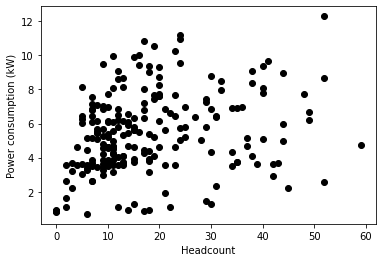

In [18]:
# scatterplot

plt.plot(occ, powr, 'o', color='black');
plt.xlabel('Headcount')
plt.ylabel('Power consumption (kW)')
plt.savefig(os.path.join('scatterplot.png'), dpi=300, format='png')

In [19]:
# covariance

import math

covariance_temp_sum = 0

x_mean = math.fsum(occ) / len(occ)
y_mean = math.fsum(powr) / len(powr)

for n in range(len(occ)):
    covariance_temp_sum += (occ[n] - x_mean) * (powr[n] - y_mean)
covariance = covariance_temp_sum / len(occ)
print(covariance)

8.034905556676346


In [20]:
# normalised covariance

from scipy import stats

print(covariance/(stats.tstd(occ)))

0.647738968390659


In [22]:
Pearson correlation

from scipy.stats import pearsonr

corr, _ = pearsonr(occ, powr)
print(corr)

0.2733240130927988


In [23]:
# fit linear curve


from numpy import arange
from pandas import read_csv
from scipy.optimize import curve_fit
from matplotlib import pyplot

def objective(x, a, c):
    return a*x+c
popt, _ = curve_fit(objective, occ, powr)
a,c = popt
print('y = %.5f * x + %.5f' % (a, c))


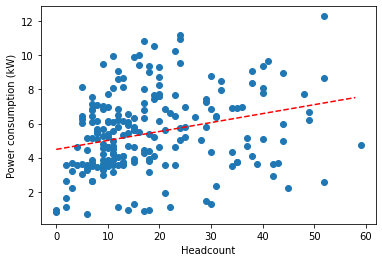

In [25]:
# plot data + linear curve


pyplot.scatter(occ, powr)
x_line = arange(min(occ), max(occ), 1)
y_line = objective(x_line, a, c)
pyplot.plot(x_line, y_line, '--', color='red')
plt.xlabel('Headcount')
plt.ylabel('Power consumption (kW)')

pyplot.savefig(os.path.join('scatterplot with regression.png'), dpi=300, format='png')
pyplot.show()


In [26]:
# reformat intersecting data to list for plotting

list_of_dates_inter=[]
powr=[]
occ=[]
for key in intersection_dates:
    list_of_dates_inter.append(key)
list_of_dates_inter=sorted(list_of_dates_inter)
for key in list_of_dates_inter:
    occ_i=occupancy_date_dict[key][0]
    powr_i=occupancy_date_dict[key][0]
    if not math.isnan(occ_i) and not math.isnan(powr_i):
        occ.append(occupancy_date_dict[key][0])
        powr.append(power_date_dict[key][0])
    

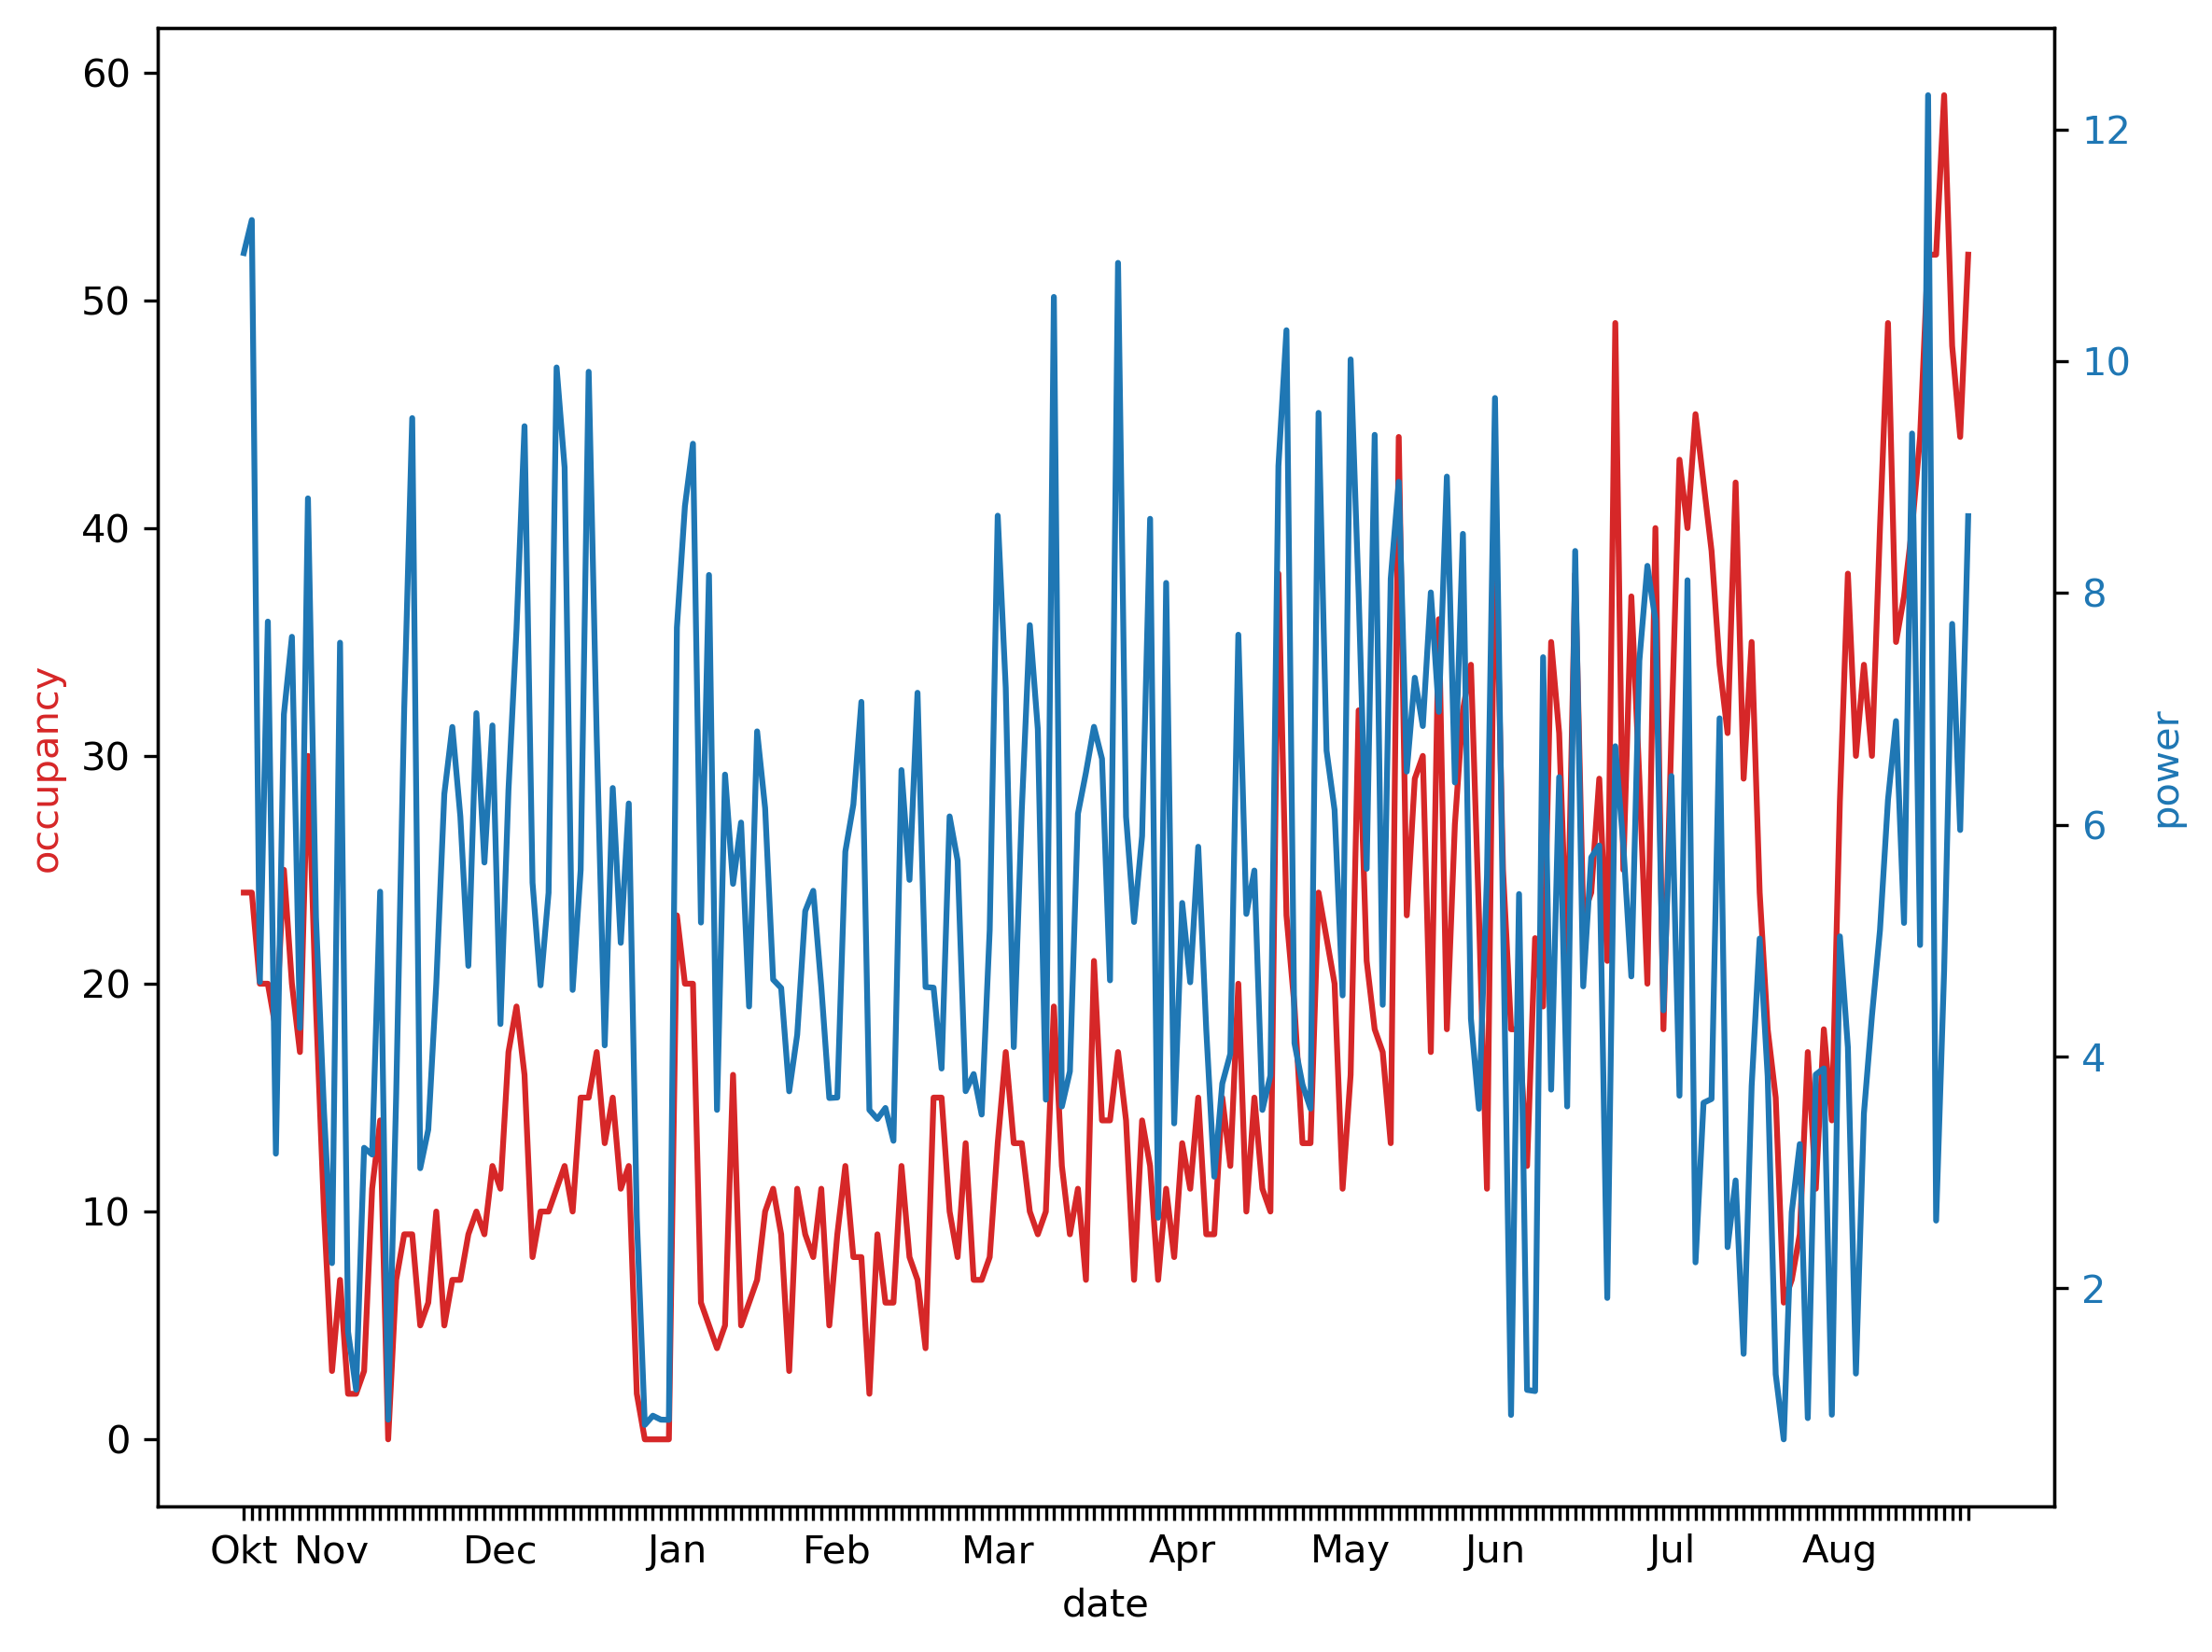

In [28]:
# plot occupancy rate and power consuption in one plot


import numpy as np
import matplotlib.pyplot as plt


# avoid overkill on x axis labels
x_labels_intersection=[]
current_month=-1
months=["Jan","Feb","Mar","Apr","May","Jun","Jul","Aug","Sep","Okt","Nov","Dec",]

for date in list_of_dates_inter:
    if date.month != current_month:
        current_month=date.month
        x_labels_intersection.append(months[date.month-1])
    else:
        x_labels_intersection.append("")

fig, ax1 = plt.subplots(figsize=(8, 6), dpi=300)
 

color = 'tab:red'
ax1.set_xlabel('date')
ax1.set_ylabel('occupancy', color=color)
ax1.plot(range(len(intersection_dates)), occ, color=color)
plt.xticks((range(len(intersection_dates))), x_labels_intersection)
# ax1.tick_params(axis='y', labelcolor=color)

ax2 = ax1.twinx() 

color = 'tab:blue'
ax2.set_ylabel('power', color=color)  
ax2.plot(range(len(intersection_dates)), powr, color=color)
ax2.tick_params(axis='y', labelcolor=color)

fig.tight_layout() 


fig.tight_layout()  
plt.savefig(os.path.join('average power consumption per day versus occupancy.png'), dpi=300, format='png')
plt.show()


In [29]:
# quadratic curve fit

from numpy import arange
from pandas import read_csv
from scipy.optimize import curve_fit
from matplotlib import pyplot

def objective(x, a,b, c):
    return a*x+b*x**2+c
popt, _ = curve_fit(objective, occ, powr)
a,b,c = popt
print('y = %.5f * x + %.5f * x^2 + %.5f' % (a, b, c))


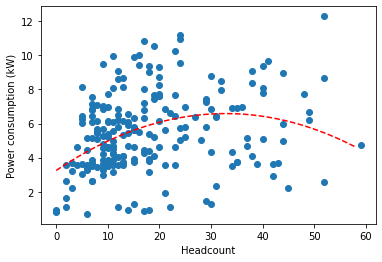

In [31]:
# plot data + quadratic curve


pyplot.scatter(occ, powr)
x_line = arange(min(occ), max(occ), 1)
y_line = objective(x_line, a,b, c)
pyplot.plot(x_line, y_line, '--', color='red')
plt.ylabel('Power consumption (kW)')
plt.xlabel('Headcount')

pyplot.savefig(os.path.join('scatterplot with quadratic regression.png'), dpi=300, format='png')
pyplot.show()


In [32]:
# logarithmic curve fit



from numpy import arange
from pandas import read_csv
from scipy.optimize import curve_fit
from matplotlib import pyplot
import numpy

occ_new=[]
powr_new=[]

for i in range(len(occ)):
    if occ[i] !=0:
        occ_new.append(occ[i])
        powr_new.append(powr[i])
    
def objective(x, a, c):
    return a*numpy.log(x)+c
popt, _ = curve_fit(objective, occ_new, powr_new)
a,c = popt

print('y = %.5f * log(x)  + %.5f' % (a, c))


y = 0.95024 * log(x)  + 2.97984


<ipython-input-32-bc624da2cfdd>:16: RuntimeWarning: divide by zero encountered in log
  return a*numpy.log(x)+c


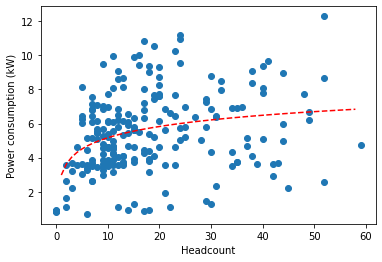

In [33]:
# plot data + logarithmic curve


pyplot.scatter(occ, powr)
x_line = arange(min(occ), max(occ), 1)
y_line = objective(x_line, a, c)
pyplot.plot(x_line, y_line, '--', color='red')
plt.ylabel('Power consumption (kW)')
plt.xlabel('Headcount')

pyplot.savefig(os.path.join('scatterplot with log regression.png'), dpi=300, format='png')
pyplot.show()


In [ ]:
# TODO: evaluate quality iof fit (via train validation data split)